In [1]:
import urllib.request
from get_finantial_docs import get_fin_docs
from sec_data_miner import Sec_data
import os
import pandas as pd
import re
22

22

In [2]:
# amazon cik: 1018724
sec = Sec_data("1018724")

dir(sec)

['CIK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'download_fin_files',
 'extract_and_sort_data',
 'get_fin_docs',
 'param_dict',
 'sort_and_clean_finfiles']

In [3]:
data = sec.get_fin_docs()
print("sss", data)

Search page URL: https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1018724&type=10-Q&dateb=&owner=exclude&start=&output=&count=100
Gettings docs URLs... 
0%...
2%...
5%...
8%...
11%...
14%...
17%...
20%...
23%...
26%...
29%...
32%...
35%...
38%...
41%...
44%...
47%...
50%...
52%...
55%...
58%...
61%...
64%...
67%...
70%...
73%...
76%...
79%...
82%...
85%...
88%...
91%...
94%...
97%...
done!...
sss [['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-20-000021&xbrl_type=v', '2020-07-31', 'https://www.sec.gov/Archives/edgar/data/1018724/000101872420000021/Financial_Report.xlsx'], ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-20-000010&xbrl_type=v', '2020-05-01', 'https://www.sec.gov/Archives/edgar/data/1018724/000101872420000010/Financial_Report.xlsx'], ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-19-000089&xbrl_type=v', '2019-10-25', 'https://www.sec.g

In [8]:
data = [['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-20-000021&xbrl_type=v',
  '2020-07-31',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872420000021/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-20-000010&xbrl_type=v',
  '2020-05-01',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872420000010/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-19-000089&xbrl_type=v',
  '2019-10-25',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872419000089/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-19-000071&xbrl_type=v',
  '2019-07-26',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872419000071/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-19-000043&xbrl_type=v',
  '2019-04-26',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872419000043/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-18-000159&xbrl_type=v',
  '2018-10-26',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872418000159/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-18-000108&xbrl_type=v',
  '2018-07-27',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872418000108/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-18-000072&xbrl_type=v',
  '2018-04-27',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872418000072/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-17-000135&xbrl_type=v',
  '2017-10-27',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872417000135/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-17-000100&xbrl_type=v',
  '2017-07-28',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872417000100/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-17-000051&xbrl_type=v',
  '2017-04-28',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872417000051/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-16-000324&xbrl_type=v',
  '2016-10-28',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872416000324/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-16-000286&xbrl_type=v',
  '2016-07-29',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872416000286/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-16-000227&xbrl_type=v',
  '2016-04-29',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872416000227/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-15-000126&xbrl_type=v',
  '2015-10-23',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872415000126/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-15-000087&xbrl_type=v',
  '2015-07-24',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872415000087/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-15-000038&xbrl_type=v',
  '2015-04-24',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872415000038/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-14-000055&xbrl_type=v',
  '2014-10-24',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872414000055/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-14-000025&xbrl_type=v',
  '2014-07-25',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872414000025/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-14-000014&xbrl_type=v',
  '2014-04-25',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872414000014/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001445305-13-002495&xbrl_type=v',
  '2013-10-25',
  'https://www.sec.gov/Archives/edgar/data/1018724/000144530513002495/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-13-303204&xbrl_type=v',
  '2013-07-26',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312513303204/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-13-174667&xbrl_type=v',
  '2013-04-26',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312513174667/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-12-436012&xbrl_type=v',
  '2012-10-26',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312512436012/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-12-317409&xbrl_type=v',
  '2012-07-27',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312512317409/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-12-187203&xbrl_type=v',
  '2012-04-27',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312512187203/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-11-280739&xbrl_type=v',
  '2011-10-26',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312511280739/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-11-197823&xbrl_type=v',
  '2011-07-27',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312511197823/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-11-110197&xbrl_type=v',
  '2011-04-27',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312511110197/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-10-233883&xbrl_type=v',
  '2010-10-22',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312510233883/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-10-164083&xbrl_type=v',
  '2010-07-23',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312510164083/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-10-090367&xbrl_type=v',
  '2010-04-23',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312510090367/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-09-212134&xbrl_type=v',
  '2009-10-23',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312509212134/Financial_Report.xls'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001193125-09-154174&xbrl_type=v',
  '2009-07-24',
  'https://www.sec.gov/Archives/edgar/data/1018724/000119312509154174/Financial_Report.xls']]

data

[['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-20-000021&xbrl_type=v',
  '2020-07-31',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872420000021/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-20-000010&xbrl_type=v',
  '2020-05-01',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872420000010/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-19-000089&xbrl_type=v',
  '2019-10-25',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872419000089/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-19-000071&xbrl_type=v',
  '2019-07-26',
  'https://www.sec.gov/Archives/edgar/data/1018724/000101872419000071/Financial_Report.xlsx'],
 ['https://www.sec.gov/cgi-bin/viewer?action=view&cik=1018724&accession_number=0001018724-19-000043&

In [4]:
path = sec.download_fin_files(data)
path

0%...
2%...
5%...
8%...
11%...
14%...
17%...
20%...
23%...
26%...
29%...
32%...
35%...
38%...
41%...
44%...
47%...
50%...
52%...
55%...
58%...
61%...
64%...
67%...
70%...
73%...
76%...
79%...
82%...
85%...
88%...
91%...
94%...
97%...
done!...
the files of company: 1018724 have been downloaded in: 1018724_finantial_docs


'1018724_finantial_docs'

In [3]:
path = '0001018724_finantial_docs'
files = sec.sort_and_clean_finfiles(path)

------------------
Index: 0
File: 2020-07-31.xlsx
sheets: 49
------------------
Index: 1
File: 2020-05-01.xlsx
sheets: 49
------------------
Index: 2
File: 2019-10-25.xlsx
sheets: 49
------------------
Index: 3
File: 2019-07-26.xlsx
sheets: 49
------------------
Index: 4
File: 2019-04-26.xlsx
sheets: 49
------------------
Index: 5
File: 2018-10-26.xlsx
sheets: 49
------------------
Index: 6
File: 2018-07-27.xlsx
sheets: 49
------------------
Index: 7
File: 2018-04-27.xlsx
sheets: 46
------------------
Index: 8
File: 2017-10-27.xlsx
sheets: 44
------------------
Index: 9
File: 2017-07-28.xlsx
sheets: 45
------------------
Index: 10
File: 2017-04-28.xlsx
sheets: 36
------------------
Index: 11
File: 2016-10-28.xlsx
sheets: 36
------------------
Index: 12
File: 2016-07-29.xlsx
sheets: 36
------------------
Index: 13
File: 2016-04-29.xlsx
sheets: 37
------------------
Index: 14
File: 2015-10-23.xlsx
sheets: 41
------------------
Index: 15
File: 2015-07-24.xlsx
sheets: 41
------------------

In [7]:
data = sec.extract_and_sort_data(files, path)

***************************************************
Searching and extracting data!
***************************************************


#################################
Index: 0
File: 2020-07-31.xlsx
------------------
Sheet: Consolidated Statements of Oper
Total net sales: 88912
Net income: 5243
------------------
Sheet: Consolidated Balance Sheets
Cash and cash equivalents: 37466
Inventories: 19599
Total current assets: 110908
Accounts payable: 51036
Long-term debt: 33128
Total current liabilities: 93896
#################################
Index: 1
File: 2020-05-01.xlsx
------------------
Sheet: Consolidated Statements of Oper
Total net sales: 75452
Net income: 2535
------------------
Sheet: Consolidated Balance Sheets
Cash and cash equivalents: 27201
Inventories: 18857
Total current assets: 85985
Accounts payable: 40056
Long-term debt: 23437
Total current liabilities: 79711
#################################
Index: 2
File: 2019-10-25.xlsx
------------------
Sheet: Consolidated Statem

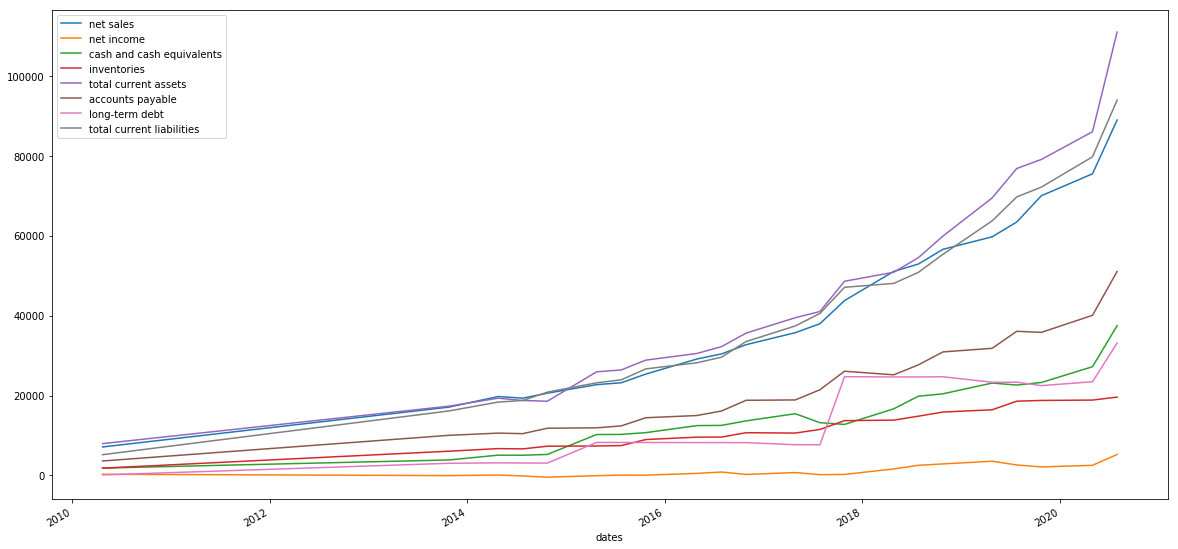

In [8]:
df = data[0]
df.plot(figsize=(20,10))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2020-07-31 to 2010-04-23
Data columns (total 8 columns):
net sales                    22 non-null int64
net income                   22 non-null int64
cash and cash equivalents    22 non-null float64
inventories                  22 non-null float64
total current assets         22 non-null float64
accounts payable             22 non-null float64
long-term debt               22 non-null float64
total current liabilities    22 non-null float64
dtypes: float64(6), int64(2)
memory usage: 1.5 KB


In [10]:
diccio = data[1]
diccio

{'net sales': [88912,
  75452,
  69981,
  63404,
  59700,
  56576,
  52886,
  51042,
  43744,
  37955,
  35714,
  32714,
  30404,
  29128,
  25358,
  23185,
  22717,
  20579,
  19340,
  19741,
  17092,
  7131],
 'net income': [5243,
  2535,
  2134,
  2625,
  3561,
  2883,
  2534,
  1629,
  256,
  197,
  724,
  252,
  857,
  513,
  79,
  92,
  -57,
  -437,
  -126,
  108,
  -41,
  299],
 'cash and cash equivalents': [37466,
  27201,
  23255,
  22616,
  23115,
  20425,
  19823,
  16676,
  12767,
  13203,
  15440,
  13656,
  12521,
  12470,
  10709,
  10269.0,
  10237,
  5258,
  5057,
  5074,
  3872,
  1844],
 'inventories': [19599,
  18857,
  18766,
  18580,
  16432,
  15862,
  14824,
  13840,
  13711,
  11510,
  10600,
  10696,
  9588,
  9582,
  8981,
  7470.0,
  7369,
  7316,
  6644,
  6716,
  6068,
  1820],
 'total current assets': [110908,
  85985,
  79054,
  76790,
  69431,
  59885,
  54481,
  50829,
  48578,
  41007,
  39460,
  35609,
  32220,
  30513,
  28849,
  26391.0,
  25922,
 